In [2]:
# Get to the sample DIR
%cd /work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/Combined_Upperlimit/set_02_EdittedSignalYieldBaseGeneration/
%ls Combine_Mass_110

/work/project/escience/ruttho/FCC-ee_SimpleDelphesAnalysis/Analysis/Combined_Upperlimit/set_02_EdittedSignalYieldBaseGeneration
combine_logger.out
Data_Card_Combine_mh110.dat
higgsCombineTest.HybridNew.mH110.1.quant0.025.root
higgsCombineTest.HybridNew.mH110.1.quant0.160.root
higgsCombineTest.HybridNew.mH110.1.quant0.500.root
higgsCombineTest.HybridNew.mH110.1.quant0.840.root
higgsCombineTest.HybridNew.mH110.1.quant0.975.root
higgsCombineTest.HybridNew.mH110.1.root


In [3]:
Mass_points={}
# Check check current dir that is dir
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt
import hist, uproot
import mplhep as hep
import awkward as ak
directories = [entry.name for entry in os.scandir() if entry.is_dir()]
for dir in directories:
    if "Combine_Mass_" in dir:
        mass_point = dir.split("_")[-1]
        q025=uproot.open(f"{dir}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.025.root")['limit;1'].arrays()['limit'][0]
        q16=uproot.open(f"{dir}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.160.root")['limit;1'].arrays()['limit'][0]
        q50=uproot.open(f"{dir}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.500.root")['limit;1'].arrays()['limit'][0]
        q84=uproot.open(f"{dir}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.840.root")['limit;1'].arrays()['limit'][0]
        q975=uproot.open(f"{dir}/higgsCombineTest.HybridNew.mH{mass_point}.1.quant0.975.root")['limit;1'].arrays()['limit'][0]
        median=uproot.open(f"{dir}/higgsCombineTest.HybridNew.mH{mass_point}.1.root")['limit;1'].arrays()['limit'][0]
        Mass_points[mass_point]=[q025, q16, [q50,median], q84, q975]

In [4]:
key_sorted = sorted(np.int_(list(Mass_points.keys())))
target_vals = []
for key in key_sorted:
    qunatiles=Mass_points[str(key)]
    target_vals.append(qunatiles)
target_vals = ak.Array(target_vals)


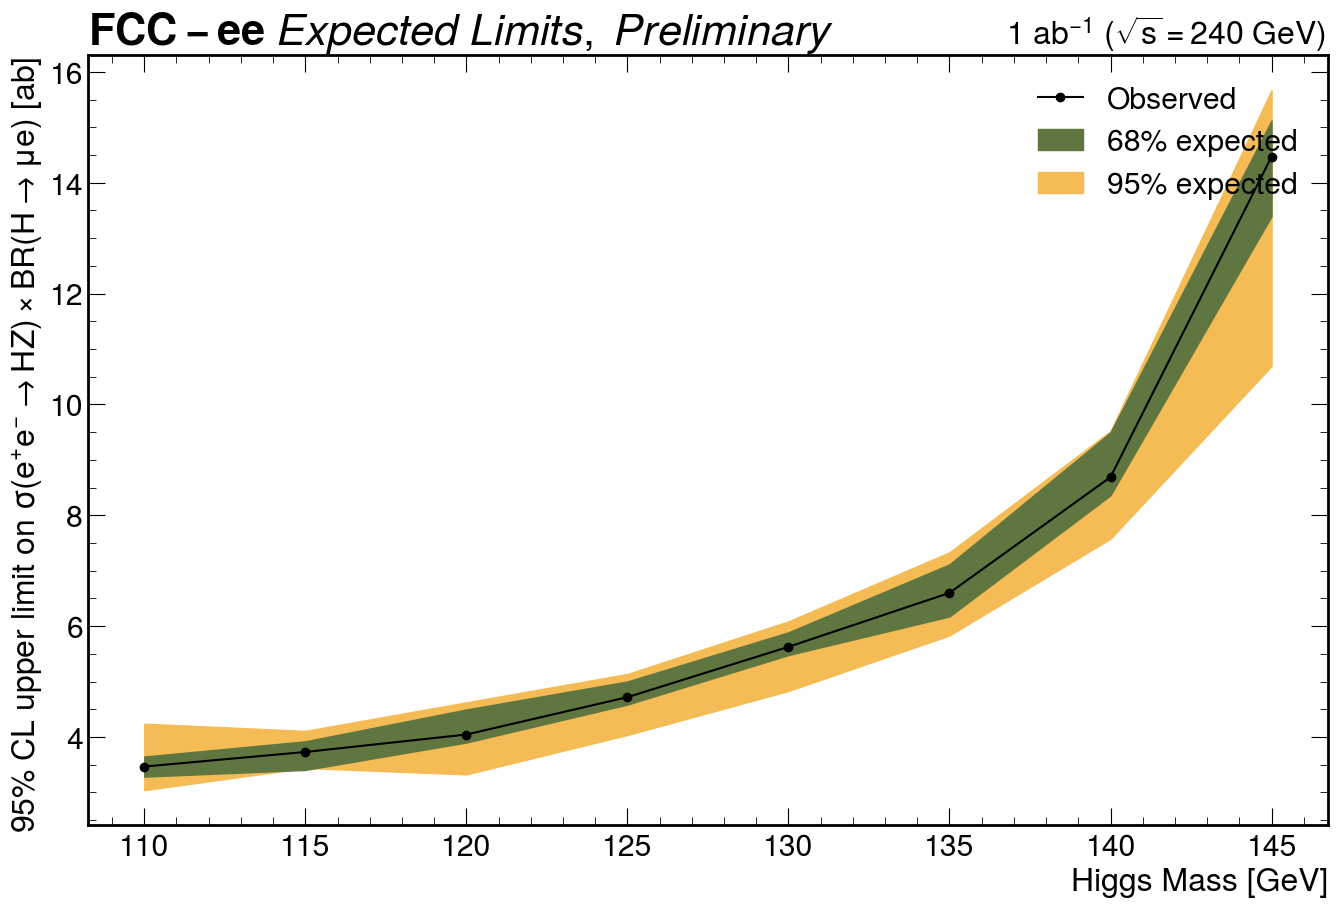

In [5]:
x = key_sorted
y1 = list(target_vals[:,0])
y2 = list(target_vals[:,1])
y3 = [i[1] for i in target_vals[:,2]]
y4 = list(target_vals[:,3])
y5 = list(target_vals[:,4])

# Load CMS style including color-scheme (it's an editable dict)
plt.style.use(hep.style.CMS)

# Setup matplotlib figure
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(1,1,1)

green = '#607641' 
yellow = '#F5BB54' 
plt.plot(x, y3, color='k', marker='o', label = "Observed", zorder=10)
plt.fill_between(np.asarray(x), 
                 np.asarray(y4), 
                 np.asarray(y2), color=green, label = "68% expected", zorder=3)
plt.fill_between(np.asarray(x), 
                 np.asarray(y5), 
                 np.asarray(y1), color=yellow, label = "95% expected")

# plt.ylim(3.5,6)
# Style
# hep.cms.label("Preliminary", data = False)
plt.title(r"$\mathbf{FCC-ee}$ $\it{Expected}$ $\it{Limits},$ $\it{Preliminary}$", loc='left')
plt.title(r"1 ab$^{-1}$ ($\sqrt{s} = 240$ GeV) ", loc='right', fontsize=23)
ax.set_ylabel(r"95% CL upper limit on $\sigma(e^{+}e^{-} \rightarrow HZ) \times \mathrm{BR}(H \rightarrow \mu e)$ [ab]", fontsize=23)
# Style
plt.legend(loc="upper right")
ax.set_xlabel("Higgs Mass [GeV]", fontsize=23)
plt.setyrange = (3, 7)
plt.savefig("FCCee_Expected_Limits_HtoMuE_1ab-1_240GeV.pdf")

In [6]:
y3

[3.465101599885935,
 3.7281720810975987,
 4.043216242214679,
 4.717064601872276,
 5.625244905038663,
 6.599125213833518,
 8.6882508353598,
 14.471990550205229]

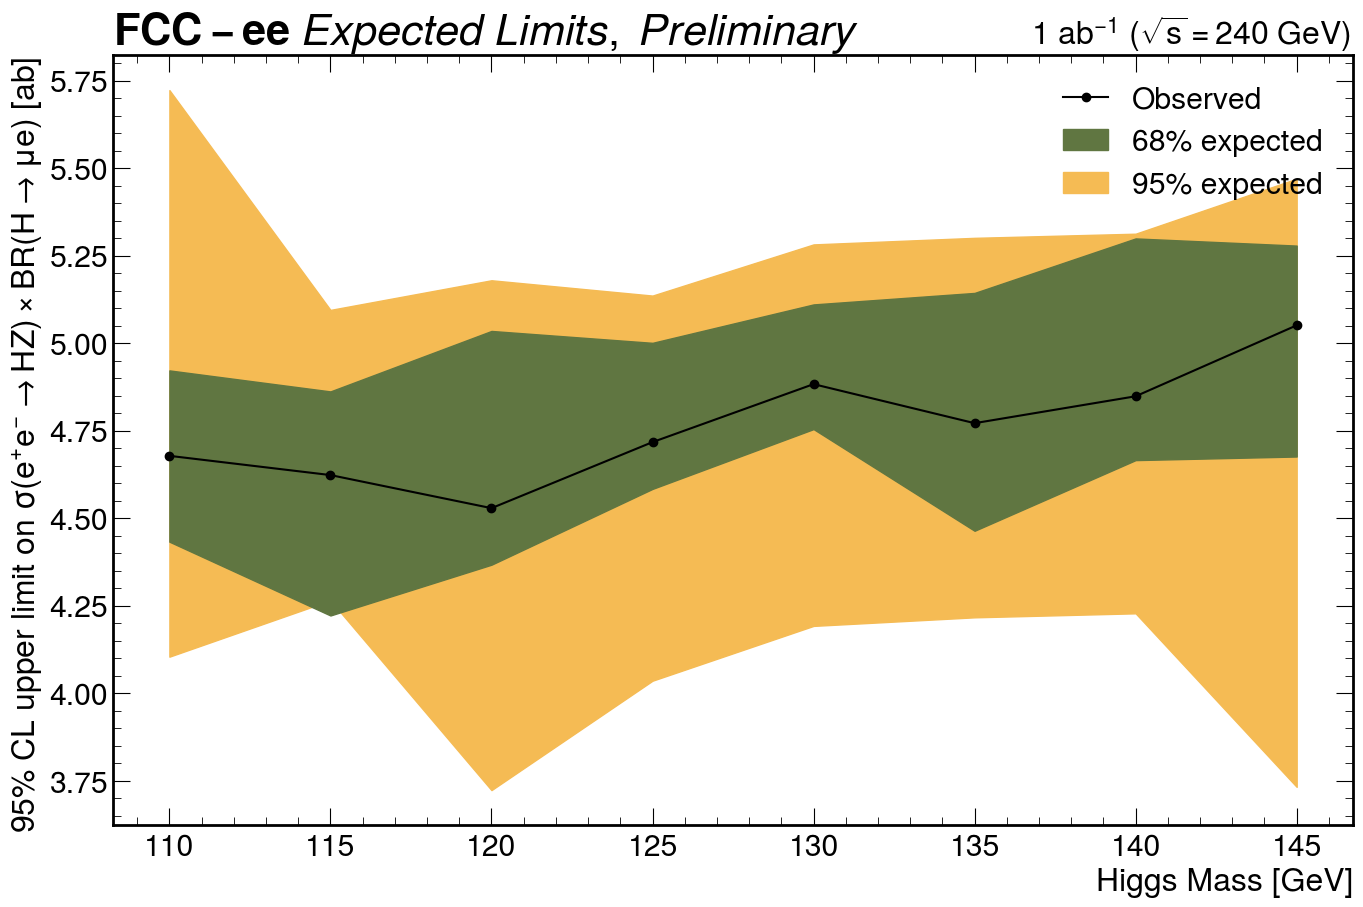

In [7]:
# for changed signal yield base generation
x = key_sorted
y1 = list(target_vals[:,0])
y2 = list(target_vals[:,1])
y3 = [i[1] for i in target_vals[:,2]]
y4 = list(target_vals[:,3])
y5 = list(target_vals[:,4])
xsec_multiplier = np.array([
    1.35,
    1.24,
    1.12,
    1,
    0.868,
    0.723,
    0.558,
    0.349
    ])

# Load CMS style including color-scheme (it's an editable dict)
plt.style.use(hep.style.CMS)

# Setup matplotlib figure
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(1,1,1)

green = '#607641' 
yellow = '#F5BB54' 
plt.plot(x, y3*np.asarray(xsec_multiplier), color='k', marker='o', label = "Observed", zorder=10)
plt.fill_between(np.asarray(x), 
                 np.asarray(y4)*np.asarray(xsec_multiplier), 
                 np.asarray(y2)*np.asarray(xsec_multiplier), color=green, label = "68% expected", zorder=3)
plt.fill_between(np.asarray(x), 
                 np.asarray(y5)*np.asarray(xsec_multiplier), 
                 np.asarray(y1)*np.asarray(xsec_multiplier), color=yellow, label = "95% expected")

# plt.ylim(3.5,6)
# Style
# hep.cms.label("Preliminary", data = False)
plt.title(r"$\mathbf{FCC-ee}$ $\it{Expected}$ $\it{Limits},$ $\it{Preliminary}$", loc='left')
plt.title(r"1 ab$^{-1}$ ($\sqrt{s} = 240$ GeV) ", loc='right', fontsize=23)
ax.set_ylabel(r"95% CL upper limit on $\sigma(e^{+}e^{-} \rightarrow HZ) \times \mathrm{BR}(H \rightarrow \mu e)$ [ab]", fontsize=23)
# Style
plt.legend(loc=1)
ax.set_xlabel("Higgs Mass [GeV]", fontsize=23)
plt.savefig("FCCee_Expected_Limits_HtoMuE_1ab-1_240GeV.pdf")

In [9]:
[i for i in y3*np.asarray(xsec_multiplier)]

[4.677887159846012,
 4.622933380561022,
 4.52840219128044,
 4.717064601872276,
 4.882712577573559,
 4.771167529601633,
 4.848043966130768,
 5.050724702021625]